In [1]:
import matplotlib.pyplot as plt
from skimage import data, color
import cv2
import numpy as np
from PIL import Image
from skimage.color import rgb2gray
from skimage.filters import gaussian

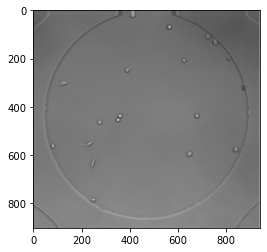

In [2]:
img=cv2.imread("final.png")

plt.imshow(img)
plt.show()

C:\Users\tasci\AppData\Local\Temp/ipykernel_4404/485414968.py:4: FutureWarning: `multichannel` is a deprecated argument name for `gaussian`. It will be removed in version 1.0.Please use `channel_axis` instead.
  gaussian_image = gaussian(img, multichannel=True)


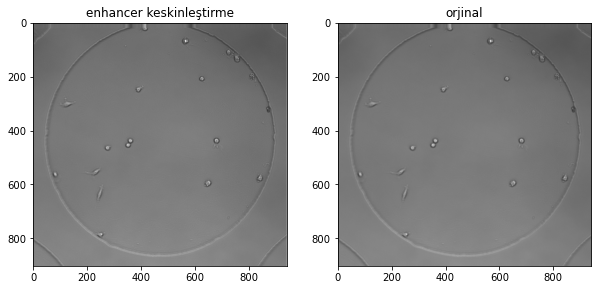

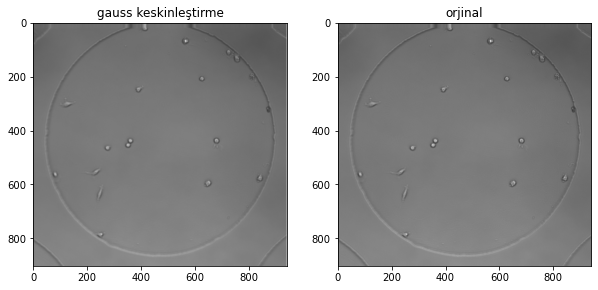

In [6]:
from PIL import Image, ImageEnhance
im = Image.open("final.png")

gaussian_image = gaussian(img, multichannel=True)

enhancer = ImageEnhance.Sharpness(im)
im_s_2 = enhancer.enhance(factor=3)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1), plt.imshow(im_s_2 ,cmap='gray'), plt.title('enhancer keskinleştirme')
plt.subplot(1,2,2), plt.imshow(img), plt.title('orjinal')

plt.show()

plt.figure(figsize=(10,10))
plt.subplot(1,2,1), plt.imshow(gaussian_image,cmap='gray'), plt.title('gauss keskinleştirme')
plt.subplot(1,2,2), plt.imshow(img), plt.title('orjinal')
plt.show()

Hemen hemen pek bir değişiklik olmadığından histogram eşitleme kullandım ve imajı griye çevirdim

C:\Users\tasci\anaconda3\lib\site-packages\skimage\_shared\utils.py:338: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


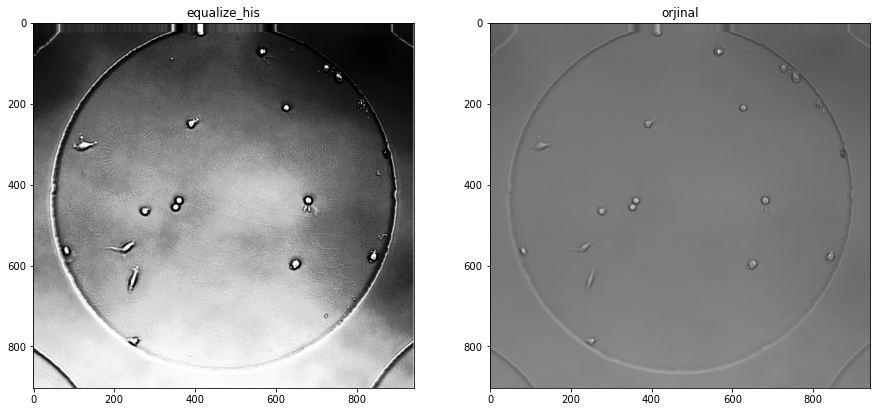

In [7]:
from skimage import exposure

img_gray=cv2.cvtColor(cv2.imread("final.png"),cv2.COLOR_BGR2RGB)

exp=exposure.equalize_hist(img_gray)

plt.figure(figsize=(15,15))
plt.subplot(1,2,1), plt.imshow(exp,cmap='gray'), plt.title('equalize_his')
plt.subplot(1,2,2), plt.imshow(img), plt.title('orjinal')
plt.show()

İstediğimiz kadar olmasa da hafif keskinleşti. İlk iki metodu deneyip ilk imajı griye çevirelim.

C:\Users\tasci\AppData\Local\Temp/ipykernel_4404/3898200346.py:3: FutureWarning: `multichannel` is a deprecated argument name for `gaussian`. It will be removed in version 1.0.Please use `channel_axis` instead.
  gaussian_image_g = gaussian(img_g, multichannel=False)


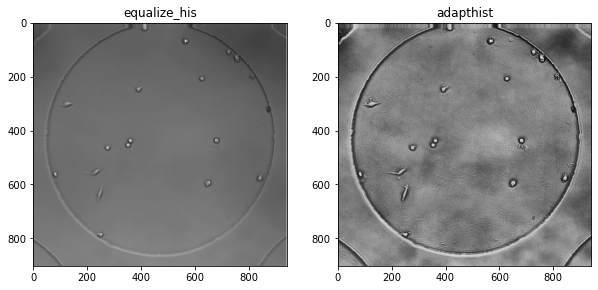

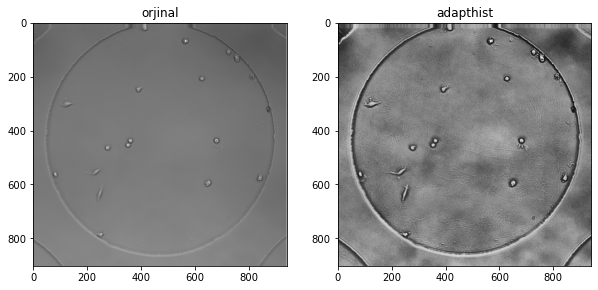

In [8]:
img_g = color.rgb2gray(img)

gaussian_image_g = gaussian(img_g, multichannel=False)
adapthist_eq_image = exposure.equalize_adapthist(img_g, clip_limit=0.05)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1), plt.imshow(gaussian_image_g, cmap='gray'), plt.title('equalize_his')
plt.subplot(1,2,2), plt.imshow(adapthist_eq_image, cmap='gray'), plt.title('adapthist')
plt.show()

plt.figure(figsize=(10,10))
plt.subplot(1,2,1), plt.imshow(img), plt.title('orjinal')
plt.subplot(1,2,2), plt.imshow(adapthist_eq_image, cmap='gray'), plt.title('adapthist')
plt.show()

C:\Users\tasci\AppData\Local\Temp/ipykernel_4404/3745580510.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  binary = adapthist_eq_image > thresh


ValueError: operands could not be broadcast together with shapes (903,942) (2,) 

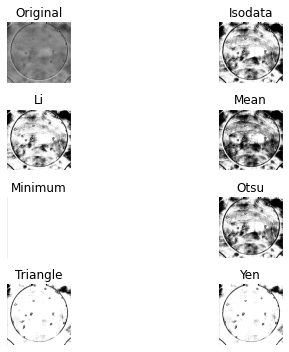

In [9]:
from skimage.filters import threshold_otsu, threshold_local, try_all_threshold, threshold_yen
from skimage import data,exposure,img_as_float

thresh = try_all_threshold(adapthist_eq_image, verbose=False)

# Gri imaj eşikten küçük olduğu durumda beyaz aksi takdirde siyah
binary = adapthist_eq_image > thresh

plt.imshow(binary)
plt.show()

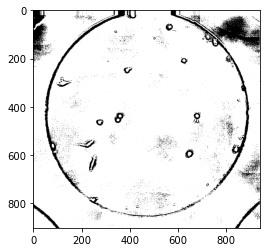

In [11]:
thresh_yen =threshold_yen(adapthist_eq_image)

# gri imaj eşikten büyükse siyah küçükse beyaz
yen = adapthist_eq_image > thresh_yen

plt.imshow(yen,cmap='gray')
plt.show()

(<AxesSubplot:title={'center':'erozyon'}>,
 Text(0.5, 1.0, 'erozyon'))

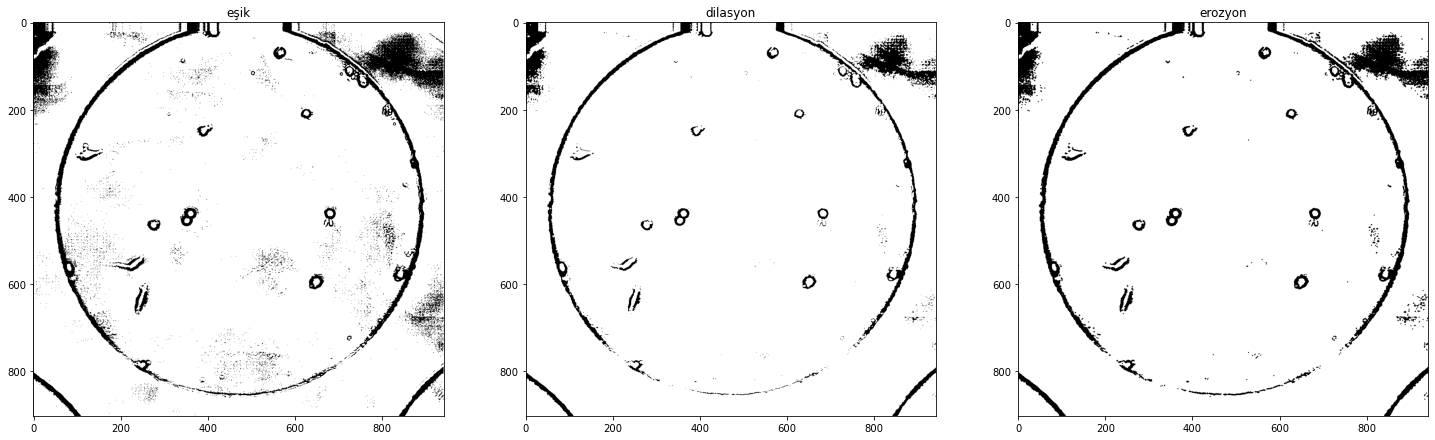

In [12]:
from skimage import morphology
import cv2 as cv

# Dilasyon
dilated_image = morphology.binary_dilation(yen)

# Erozyon
eroded_image_shape = morphology.binary_erosion(dilated_image)

plt.figure(figsize=(25,25))
plt.subplot(1,3,1), plt.imshow(yen, cmap='gray'), plt.title('eşik',)
plt.subplot(1,3,2), plt.imshow(dilated_image,cmap='gray'), plt.title('dilasyon')
plt.subplot(1,3,3), plt.imshow(eroded_image_shape,cmap='gray'), plt.title('erozyon')

Erezyonun daha iyi sonuç verdiği gözüküyor.

In [13]:
eroded_image_shape

array([[False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

Köşeleri temizleyip maskeleme yapmamız lazım. İmajımız bool vektörü olarak döndüğü için tekrardan imaja çevirmemiz gerekir.

In [14]:
new_image_g = eroded_image_shape.astype(np.uint8)
print(new_image_g.shape)
new_image_g

(903, 942)


array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

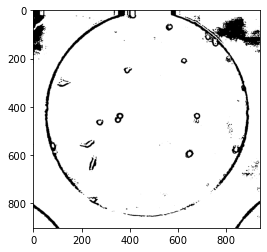

In [15]:
dst = cv.fastNlMeansDenoising(new_image_g, None, 5, 1, 2)
plt.imshow(dst, cmap='gray')
plt.show()

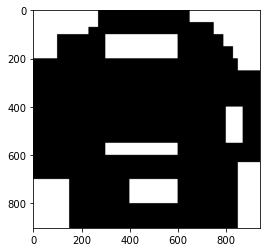

In [17]:
# Maskeleme yapımı
mask =np.zeros(dst.shape[0:2], dtype = bool)

# Sol üst
mask[0:200, 0: 100] = 1
mask[0:100, 0: 230] = 1
mask[0:70, 0: 270] = 1
#sol alt
mask[700:950, 0:150] = 1

# Sağ alt
mask[630:950, 850:950] = 1

# Sağ üst
mask[0:100, 750:950] = 1
mask[0:50, 650:950] = 1
mask[0:250, 850:950] = 1
mask[50:150, 800:850] = 1
mask[50:150, 790:850] = 1
mask[150:200, 830:850] = 1

# İmaj içi
mask[400:550, 800:870] = 1
mask[700:800, 400:600] = 1
mask[100:200, 300:600] = 1
mask[550:600, 300:600] = 1
plt.imshow(mask,cmap='gray')
plt.show()

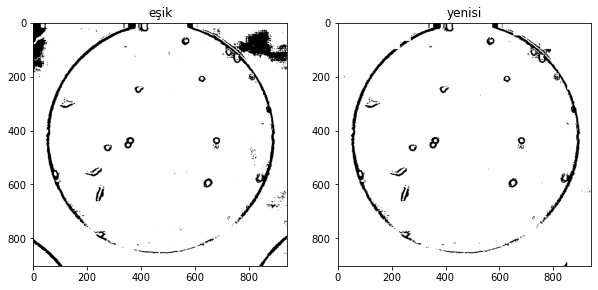

In [18]:
image_defect = (new_image_g+255) * ~(mask)+255
image_defect

plt.figure(figsize=(10,10))
plt.subplot(1,2,1), plt.imshow(dst,cmap='gray'), plt.title('eşik')
plt.subplot(1,2,2), plt.imshow(image_defect,cmap='gray'), plt.title('yenisi')

plt.show()

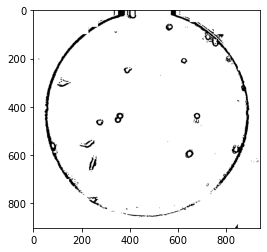

In [19]:
part=image_defect.copy()

part[0:200, 0: 100] = 255
#sol alt
part[700:950, 0:150] = 255
#sağ alt
part[630:950, 850:950] = 255
#sağ üst
part[0:100, 750:950] = 255
part[0:250, 850:950] = 255
part[50:150, 800:850] = 255

plt.imshow(part,cmap='gray')
plt.show()

In [21]:
# Connected Component Algoritması

from skimage import measure
img_stretch = cv2.resize(part, (1100, 1100))


all_labels = measure.label(part )

blobs_labels = measure.label(part , background=5)
contours,hierarchy = cv.findContours(part, 1, 2)

cnt = contours[0]
M = cv.moments(cnt)
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])


area = cv.contourArea(cnt)
print("alan",area)

perimeter = cv.arcLength(cnt,True)

print("cevre",perimeter)
k = cv.isContourConvex(cnt)
k

alan 848782.0
cevre 3686.0


True

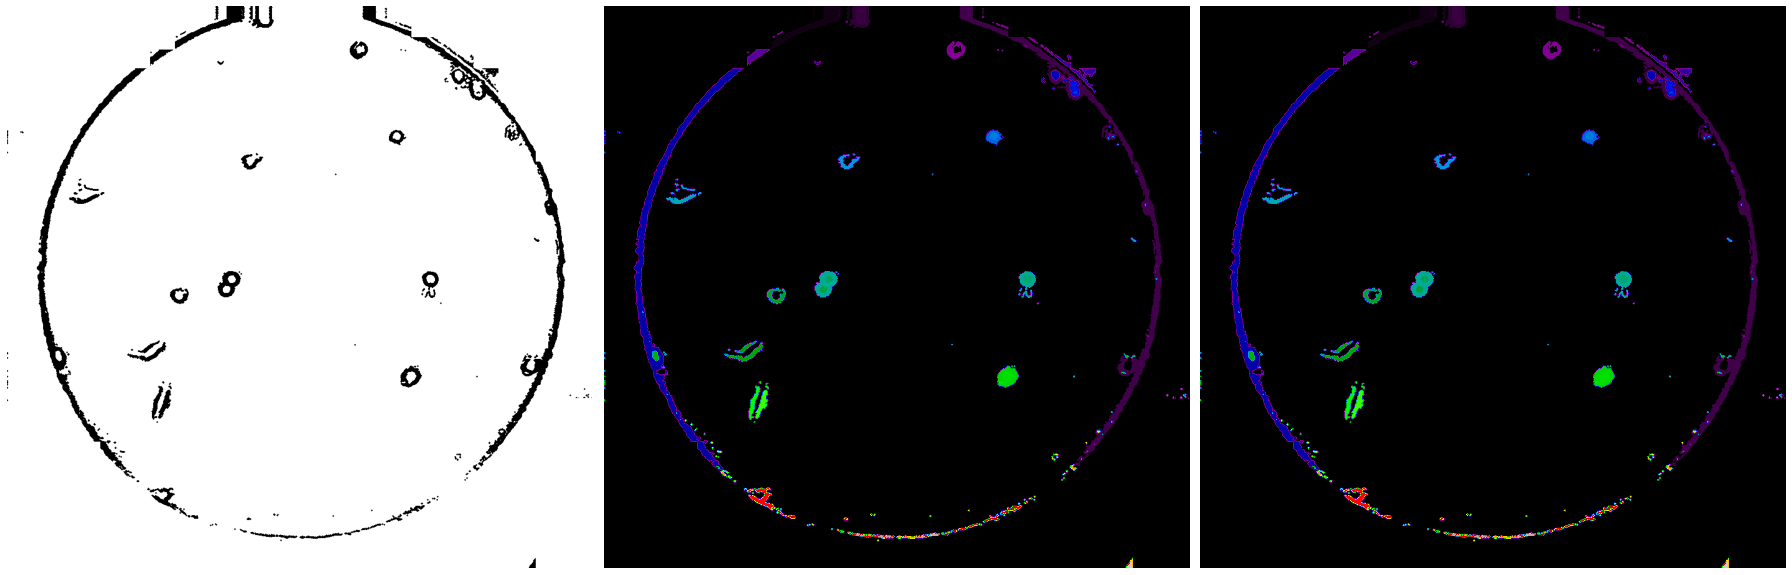

In [24]:
plt.figure(figsize=(25, 25))
plt.subplot(131)
plt.imshow(part, cmap='gray')
plt.axis('off')
plt.subplot(132)
plt.imshow(all_labels, cmap='nipy_spectral')
plt.axis('off')
plt.subplot(133)
plt.imshow(blobs_labels, cmap='nipy_spectral')
plt.axis('off')

plt.tight_layout()
plt.show()

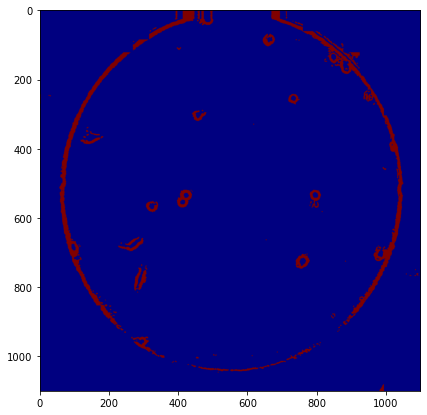

In [25]:
# Kenarları bulalım

import cv2

(minValue, maxValue, minPosition, maxPosition) = cv2.minMaxLoc(img_stretch)
img_stretch = 255 * (img_stretch - minValue) / (maxValue - minValue)

img_stretch = np.uint8(img_stretch)

binaryImageCloneColorMap = cv2.applyColorMap(img_stretch, cv2.COLORMAP_JET)

plt.figure(figsize=(7, 7))
plt.imshow(binaryImageCloneColorMap)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


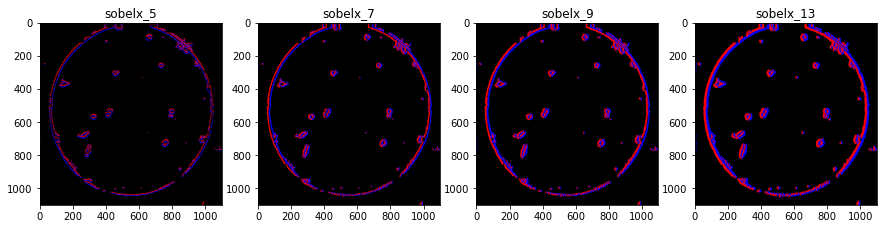

In [26]:
from skimage.feature import canny
from skimage import color
from skimage.filters import sobel


sobelx_5 = cv2.Sobel(binaryImageCloneColorMap,ddepth=cv2.CV_32F, dx=0, dy=1,ksize=5) 
sobelx_7 = cv2.Sobel(binaryImageCloneColorMap,cv2.CV_64F,1,0,ksize=7) 
sobelx_9 = cv2.Sobel(binaryImageCloneColorMap,cv2.CV_64F,1,0,ksize=9) 
sobelx_13 = cv2.Sobel(binaryImageCloneColorMap,cv2.CV_64F,1,0,ksize=13) 

plt.figure(figsize=(15,15))
plt.subplot(1,4,1), plt.imshow(sobelx_5), plt.title('sobelx_5',)
plt.subplot(1,4,2), plt.imshow(sobelx_7), plt.title('sobelx_7')
plt.subplot(1,4,3), plt.imshow(sobelx_9), plt.title('sobelx_9')
plt.subplot(1,4,4), plt.imshow(sobelx_13), plt.title('sobelx_13')
plt.show()

In [27]:
# Gri imaja dönüştürülmesi

binaryImageCloneColorMap.shape
bic_g=color.rgb2gray(binaryImageCloneColorMap)

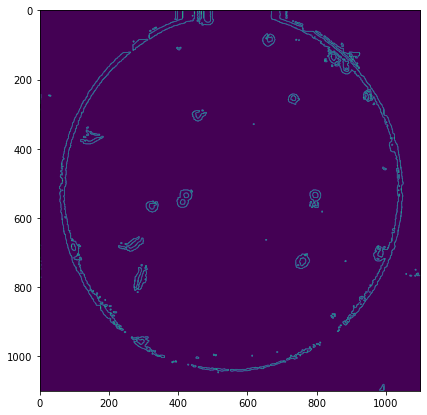

In [28]:
#canny ile tespit

import skimage.io
import skimage.feature

edges = skimage.feature.canny(
        image=bic_g,
        sigma=0.5,
        low_threshold=0.01,
        high_threshold=0.03)


plt.figure(figsize=(7, 7))
plt.imshow(edges)
plt.show()

Maskeleme yapıldığı görülüyor bunun için adaptive, morfoloji ve erozyona bakmamız gerekir.

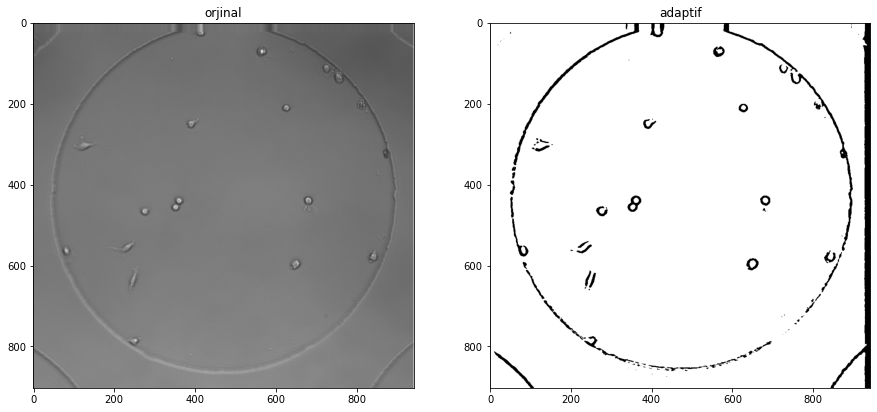

In [30]:
blur=cv2.medianBlur(img,5)

blur_g=cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)


img_adapt=cv2.adaptiveThreshold(blur_g, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 53, 6)


plt.figure(figsize=(15,15))
plt.subplot(1,2,1), plt.imshow(img), plt.title('orjinal',)
plt.subplot(1,2,2), plt.imshow(img_adapt,cmap='gray'), plt.title('adaptif')
plt.show()

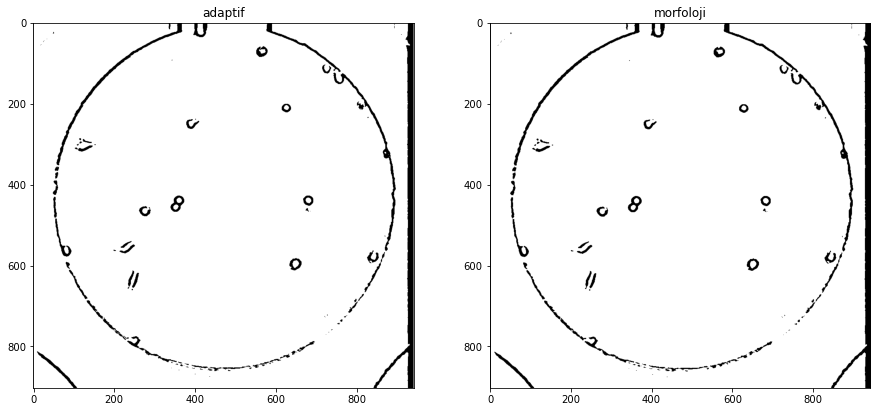

In [32]:
morf_1 = cv.morphologyEx(img_adapt, cv.MORPH_OPEN, np.ones([2,2]))

plt.figure(figsize=(15,15))
plt.subplot(1,2,1), plt.imshow(img_adapt,cmap='gray'), plt.title('adaptif',)
plt.subplot(1,2,2), plt.imshow(morf_1,cmap='gray'), plt.title('morfoloji')
plt.show()

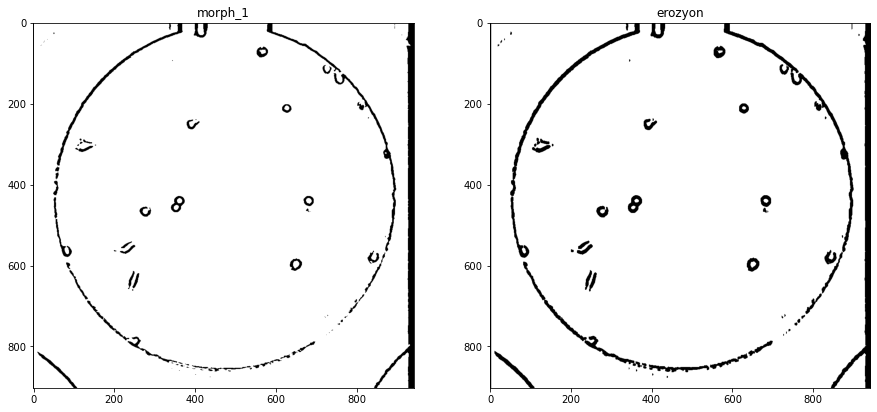

In [33]:
M = cv.getStructuringElement(cv.MORPH_ELLIPSE, (2,5))

morph_2=cv2.erode(morf_1, M,iterations=1) 

plt.figure(figsize=(15,15))
plt.subplot(1,2,1), plt.imshow(morf_1,cmap='gray'), plt.title('morph_1',)
plt.subplot(1,2,2), plt.imshow(morph_2,cmap='gray'), plt.title('erozyon')
plt.show()

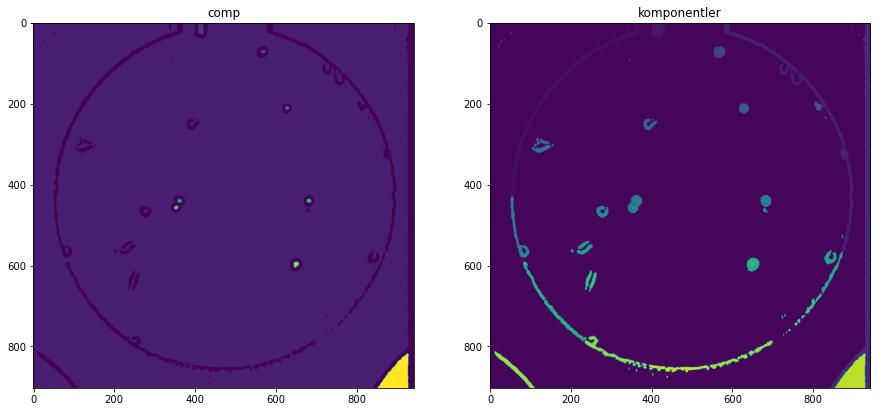

In [34]:
# Connected Component'i tekrarlama

from skimage import measure

blobs_labels_2 = measure.label(morph_2 , background=10)

ret,comp=cv2.connectedComponents(morph_2)



plt.figure(figsize=(15,15))
plt.subplot(1,2,1), plt.imshow(comp), plt.title('comp',)
plt.subplot(1,2,2), plt.imshow(blobs_labels_2), plt.title('komponentler')
plt.show()